In [ ]:
#best for multiclass
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to load images and labels from directory
def load_images_and_labels_from_directory(root_directory, desired_width, desired_height):
    images = []
    labels = []
    class_folders = sorted(os.listdir(root_directory))
    label = 0
    for class_folder in class_folders:
        class_path = os.path.join(root_directory, class_folder)
        if os.path.isdir(class_path):
            image_files = sorted(os.listdir(class_path))
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.resize(img, (desired_width, desired_height))
                    images.append(img)
                    labels.append(label)
            label += 1
    return np.array(images), np.array(labels)

# Load images and labels from directory
root_directory = '/content/drive/MyDrive/Lettuce2'
desired_width = 100
desired_height = 100
images, labels = load_images_and_labels_from_directory(root_directory, desired_width, desired_height)

# Preprocess images
images = images.astype('float32') / 255

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=1)

# Define  architecture
def model1(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
   # x = Dropout(0.25)(x)  # Adding dropout after the first convolutional layer

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
   # x = Dropout(0.25)(x)  # Adding dropout after the second convolutional layer

    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
   # x = Dropout(0.25)(x)  # Adding dropout after the first dense layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (desired_width, desired_height, 3)  # Assuming RGB images
num_classes = len(np.unique(labels))  # Number of unique classes in the dataset

# Create ResNet model
model = model1(input_shape, num_classes)

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train the model with EarlyStopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Predict labels and encodings for the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print the actual and predicted labels along with their encodings
print("Actual Labels:", y_test)
print("Predicted Labels:", predicted_labels)


Epoch 1/100
6/6 [==============================] - 19s 3s/step - loss: 6.1684 - accuracy: 0.1850 - val_loss: 2.1718 - val_accuracy: 0.2000
Epoch 2/100
6/6 [==============================] - 15s 3s/step - loss: 2.0464 - accuracy: 0.1503 - val_loss: 1.8755 - val_accuracy: 0.2000
Epoch 3/100
6/6 [==============================] - 18s 3s/step - loss: 1.7722 - accuracy: 0.3642 - val_loss: 1.4092 - val_accuracy: 0.4500
Epoch 4/100
6/6 [==============================] - 17s 3s/step - loss: 1.2752 - accuracy: 0.5607 - val_loss: 1.2986 - val_accuracy: 0.3500
Epoch 5/100
6/6 [==============================] - 16s 3s/step - loss: 0.8157 - accuracy: 0.6994 - val_loss: 1.2750 - val_accuracy: 0.3500
Epoch 6/100
6/6 [==============================] - 17s 3s/step - loss: 0.5303 - accuracy: 0.8035 - val_loss: 1.2038 - val_accuracy: 0.6000
Epoch 7/100
6/6 [==============================] - 17s 3s/step - loss: 0.4256 - accuracy: 0.8439 - val_loss: 1.1882 - val_accuracy: 0.5000
Epoch 8/100
6/6 [==========

1/1 [==============================] - 1s 617ms/step
Actual Labels: [1 3 6 1 7 0 5 3 4 7 6 5 1 0 4 2 1 2 1 6]
Predicted Labels: [3 3 6 1 1 2 5 3 5 7 6 5 1 0 5 2 1 0 1 6]


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def load_images_and_labels_from_directory(root_directory, desired_width, desired_height):
    images = []
    labels = []
    class_folders = sorted(os.listdir(root_directory))
    label = 0
    for class_folder in class_folders:
        class_path = os.path.join(root_directory, class_folder)
        if os.path.isdir(class_path):
            image_files = sorted(os.listdir(class_path))
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)
                if img is not None:
                    img = cv2.resize(img, (desired_width, desired_height))
                    images.append(img)
                    labels.append(label)
            label += 1
    return np.array(images), np.array(labels)

def map_labels_to_binary(labels):
    binary_labels = []
    for label in labels:
        if label == 5:
            binary_labels.append(1)
        else:
            binary_labels.append(0)
    return np.array(binary_labels)

def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)  # Sigmoid activation for binary classification
    model = Model(inputs, outputs)
    return model

root_directory = '/content/drive/MyDrive/Lettuce2'
desired_width = 100
desired_height = 100

images, labels = load_images_and_labels_from_directory(root_directory, desired_width, desired_height)
binary_labels = map_labels_to_binary(labels)

# Split data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(images, binary_labels, test_size=0.2, random_state=42, stratify=binary_labels)

# Count occurrences of labels in the test set
label_counts = np.bincount(y_test)

# Find the minority class label
minority_label = np.argmin(label_counts)

# Get the indices of minority class samples
minority_indices = np.where(y_test == minority_label)[0]

# Randomly select an equal number of samples from the minority class
num_samples_per_class = label_counts.min()
random_indices = np.random.choice(minority_indices, size=num_samples_per_class, replace=False)

# Concatenate the indices of minority class samples with the indices of majority class samples
majority_indices = np.where(y_test != minority_label)[0]
balanced_indices = np.concatenate((random_indices, majority_indices))

# Update the test set with balanced indices
X_test_balanced = X_test[balanced_indices]
y_test_balanced = y_test[balanced_indices]

input_shape = (desired_width, desired_height, 3)
num_classes = 1
model = ResNet(input_shape, num_classes)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test_balanced, y_test_balanced))

test_loss, test_acc = model.evaluate(X_test_balanced, y_test_balanced)
print("Test Accuracy (Balanced):", test_acc)

y_pred_balanced = model.predict(X_test_balanced)
predicted_labels_balanced = (y_pred_balanced > 0.5).astype("int32")

print("Actual labels (Balanced):", y_test_balanced)
print("Predicted labels (Balanced):", predicted_labels_balanced)


Epoch 1/10
5/5 [==============================] - 21s 4s/step - loss: 5460.5396 - accuracy: 0.7468 - val_loss: 4832.9321 - val_accuracy: 0.8462
Epoch 2/10
5/5 [==============================] - 18s 4s/step - loss: 2505.9651 - accuracy: 0.8506 - val_loss: 839.3053 - val_accuracy: 0.1538
Epoch 3/10
5/5 [==============================] - 19s 4s/step - loss: 386.4574 - accuracy: 0.5909 - val_loss: 314.8545 - val_accuracy: 0.8462
Epoch 4/10
5/5 [==============================] - 17s 4s/step - loss: 175.0236 - accuracy: 0.8701 - val_loss: 75.7888 - val_accuracy: 0.7692
Epoch 5/10
5/5 [==============================] - 17s 4s/step - loss: 61.9472 - accuracy: 0.8571 - val_loss: 58.0590 - val_accuracy: 0.7949
Epoch 6/10
5/5 [==============================] - 19s 4s/step - loss: 47.2971 - accuracy: 0.9026 - val_loss: 58.7191 - val_accuracy: 0.8462
Epoch 7/10
5/5 [==============================] - 18s 4s/step - loss: 13.3117 - accuracy: 0.9481 - val_loss: 29.4042 - val_accuracy: 0.7949
Epoch 8/10

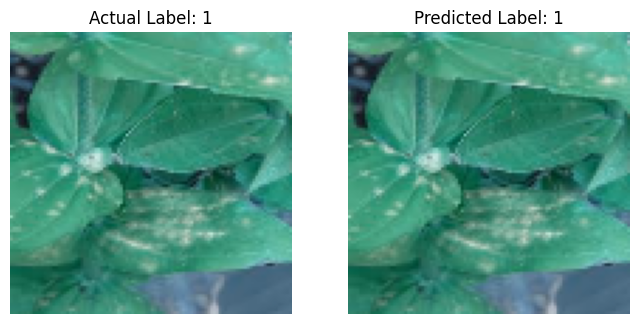

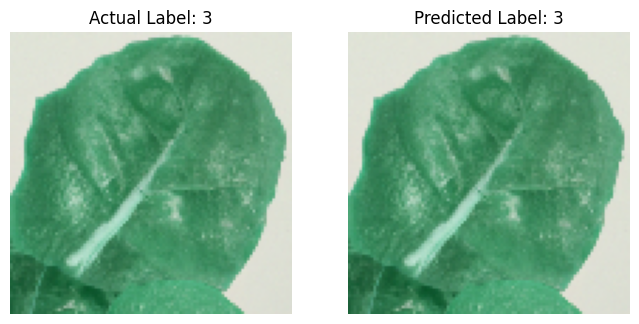

In [3]:

for i in range(2):
    plt.figure(figsize=(8, 4))

    # Show the image
    plt.subplot(1, 2, 1)
    plt.imshow(X_test[i])
    plt.title("Actual Label: {}".format(y_test[i]))
    plt.axis('off')

    # Show the predicted label
    plt.subplot(1, 2, 2)
    plt.imshow(X_test[i])
    plt.title("Predicted Label: {}".format(predicted_labels[i]))
    plt.axis('off')

plt.show()